# Importação das bibliotecas

In [465]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier

# Importação da base de dados

In [466]:
df = pd.read_csv('database/drug200.csv', decimal='.', delimiter=',')

# Informações sobre os dados

Significado das Abreviações

- (BP) - Níveis de pressão arterial
- (Cholesterol) - Níveis de colesterol
- (Na_to_K) - Proporção Na para Potássio

## Informações gerais

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Número de valores ausentes em cada coluna

In [468]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# Informações gráficas

## Distribuição

<Axes: xlabel='Na_to_K', ylabel='Count'>

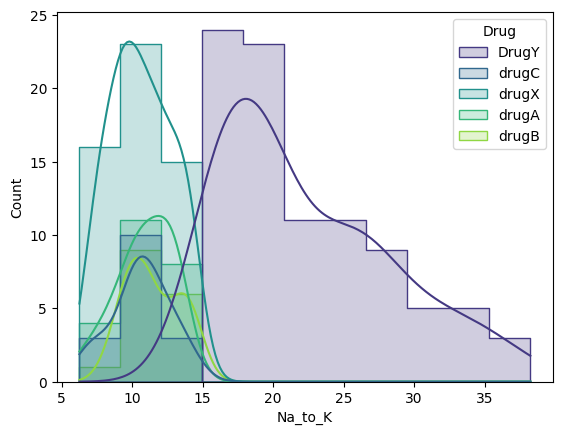

In [469]:
sns.histplot(data=df, x='Na_to_K', hue='Drug', element='step', kde=True, palette='viridis')

## Porcentagem do uso de determinadas drogas por sexo

<Axes: xlabel='Drug', ylabel='percent'>

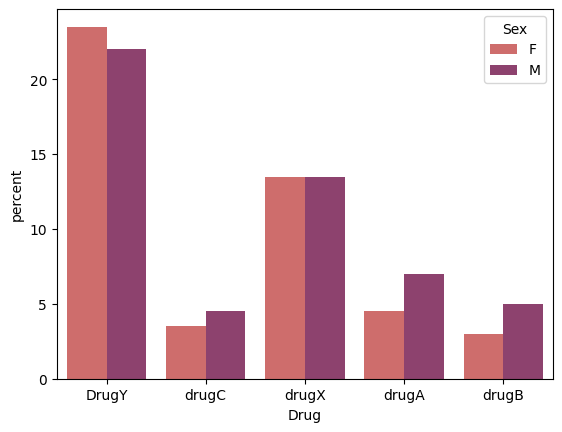

In [470]:
sns.countplot(data=df, x='Drug', hue='Sex', stat='percent', palette='flare')

### Porcentagem do nível de colesterol por sexo

<Axes: xlabel='Cholesterol', ylabel='percent'>

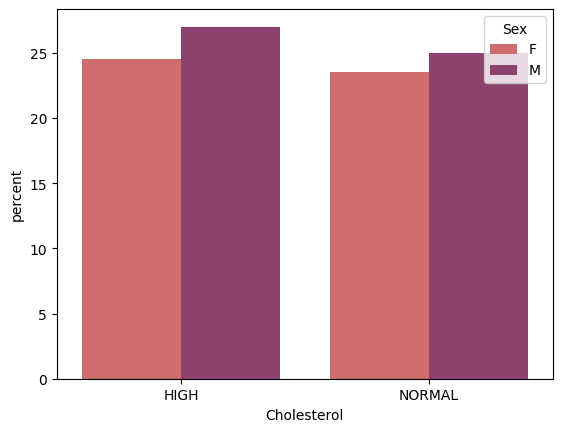

In [471]:
sns.countplot(data=df, x='Cholesterol', hue='Sex', stat='percent', palette='flare')

# Transformando as variáveis categóricas em numéricas

In [472]:
# transformações das variáveis
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.BP = le.fit_transform(df.BP)
df.Cholesterol = le.fit_transform(df.Cholesterol)

print('Tranformações das colunas (Sex, BP, Cholesterol)')
df

Tranformações das colunas (Sex, BP, Cholesterol)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


# Dividindo os dados em dados de testes e de treino

In [473]:
# Variáveis independentes
X = df.drop(columns='Drug')

# Variável dependente
y = df['Drug']

# Separação dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Criação do Modelo

In [474]:
# Modelo
model = RandomForestClassifier(n_estimators=4,
                               max_depth=5,
                               criterion='entropy',
                               random_state=2)

# Treinando o modelo
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=4,
                       random_state=2)

# Avaliando a performance do modelo

In [475]:
# Predição no dados de teste
y_pred = model.predict(X_test)

# Acurácia
acc = accuracy_score(y_test, y_pred) * 100

# Validação cruzada
k_fold = KFold(n_splits=5)
cv = cross_val_score(model, X, y, cv=k_fold)
result_cv = np.mean(cv) * 100

# Recall
rs = recall_score(y_test, y_pred, average='micro') * 100

# Resultado
pd.DataFrame([acc, result_cv, rs],
             columns=['Resultado das métricas %'],
             index=['Acurácia', 'Validação cruzada', 'Recall'])

,Resultado das métricas %
Acurácia,100.0
Validação cruzada,96.0
Recall,100.0
